#### Setting up the File

In [235]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Formatting API Request

We need the url of the website - which is clear from the website; we also have to specify the year - which is 2018 - and we need to specify the exact dataset we need, which is 'abstcb'. To change the dataset, we would change the tech_dataset variable. 

The tech_url is just combining these variables above together so we can properly call the API. 

Here, we want to grab the data that we need. We really just want the state name (NAME), ethnic group (ETH_GROUP), ethnic group label (ETH_GROUP_LABEL), employee count (EMP), and factors adversely affecting technology production(FACTORS_P), and motivation for technology use (MOTUSETECH). The tech predicates are the specifications of what we're looking for. The 'get' values are simply the columns that we need, the 'for' value clarifies that we're looking for the state information, not the United States per se. For this matter, we could theoretically use the US data because we don't absolutely need the states for this part, but it doesn't really matter. 

The tech_response is the actual request, the object returned when we call the API. 

In [384]:
tech_url = 'https://api.census.gov/data'
tech_year = '2018'
tech_dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET

tech_url = '/'.join([tech_url, tech_year, tech_dataset])

# FORMATTING API REQUEST

tech_predicates = {}
get_vars = ['NAME', 'ETH_GROUP', 'ETH_GROUP_LABEL', 'EMP', 'FACTORS_P', 'FACTORS_P_LABEL', 'MOTUSETECH'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
tech_predicates['get'] = ','.join(get_vars)
tech_predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
tech_predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
tech_response = requests.get(tech_url, params=tech_predicates)


This part below is pretty simple; we're turning the request into a json object, then turning it into an object. Notice that the columns is the first value of the JSON object while the data is everything else. 

In [387]:
tech_json = tech_response.json()
tech_columns = tech_json[0]

tech_df = pd.DataFrame(columns = tech_columns, data = tech_json[1:])

Now we're getting into the really dirty work, but it's pretty simple after the first run; we're going to repeat the same process several times so the main explanation will take place here and we'll only explain any changes in the future. 

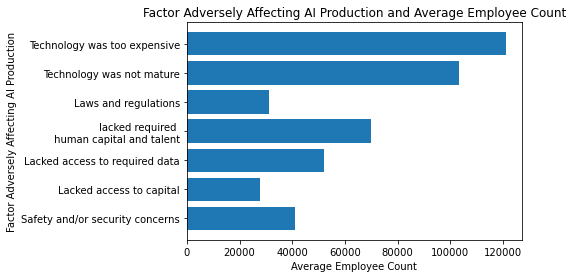

In [386]:
# Cleaning the data

tech_df_fixed = tech_df[tech_df['FACTORS_P_LABEL'] != 'All firms']
tech_df_fixed = tech_df_fixed[tech_df_fixed['ETH_GROUP_LABEL'] == 'Total']
tech_df_fixed['EMP'] = tech_df_fixed['EMP'].astype('int32')
tech_df_factor_grouped = tech_df_fixed.groupby('FACTORS_P_LABEL', as_index = False)['EMP'].mean()

tech_df_AI = tech_df_factor_grouped[0:10]
tech_df_AI = tech_df_AI[tech_df_AI['FACTORS_P_LABEL'] != 'Artificial Intelligence: Technology not applicable to this business']
tech_df_AI = tech_df_AI[tech_df_AI['FACTORS_P_LABEL'] != 'Artificial Intelligence: No factors adversely affected the adoption of this technology']
tech_df_AI = tech_df_AI[tech_df_AI['FACTORS_P_LABEL'] != 'Artificial Intelligence: Required data not reliable']
factors_p_label = tech_df_AI['FACTORS_P_LABEL'].str[25:]
factors_p_label = factors_p_label.replace('Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')
factors_p_label = factors_p_label.replace('Lacked access to required human capital and talent', 'lacked required \n human capital and talent')
emp_info = tech_df_AI['EMP']

tech_df_AI_plot = plt.barh(factors_p_label, emp_info)
tech_df_AI_plot = plt.xlabel('Average Employee Count')
tech_df_AI_plot = plt.ylabel('Factor Adversely Affecting AI Production')
tech_df_AI_plot = plt.ticklabel_format(style = 'plain', axis = 'x')
tech_df_AI_plot = plt.title('Factor Adversely Affecting AI Production and Average Employee Count')

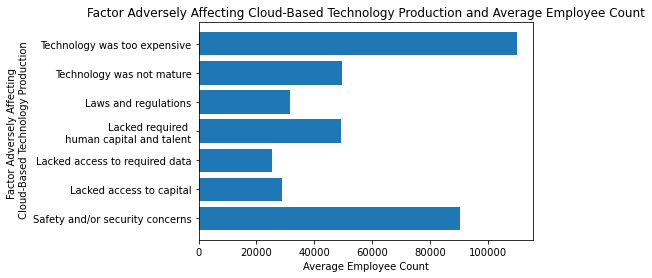

In [365]:
tech_df_cloud = tech_df_factor_grouped[11:21]
tech_df_cloud = tech_df_cloud[tech_df_cloud['FACTORS_P_LABEL'] != 'Cloud-Based: Technology not applicable to this business']
tech_df_cloud = tech_df_cloud[tech_df_cloud['FACTORS_P_LABEL'] != 'Cloud-Based: No factors adversely affected the adoption of this technology']
tech_df_cloud = tech_df_cloud[tech_df_cloud['FACTORS_P_LABEL'] != 'Cloud-Based: Required data not reliable']

factors_p_label_cloud = tech_df_cloud['FACTORS_P_LABEL'].str[13:]
factors_p_label_cloud = factors_p_label_cloud.replace('Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')
factors_p_label_cloud = factors_p_label_cloud.replace('Lacked access to required human capital and talent', 'Lacked required \n human capital and talent')
cloud_emp_info = tech_df_cloud['EMP']

tech_df_cloud_plot = plt.barh(factors_p_label_cloud, cloud_emp_info)
tech_df_cloud_plot = plt.xlabel('Average Employee Count')
tech_df_cloud_plot = plt.ylabel('Factor Adversely Affecting \n Cloud-Based Technology Production')
tech_df_cloud_plot = plt.title('Factor Adversely Affecting Cloud-Based Technology Production and Average Employee Count')
tech_df_cloud_plot = plt.ticklabel_format(style = 'plain', axis = 'x')

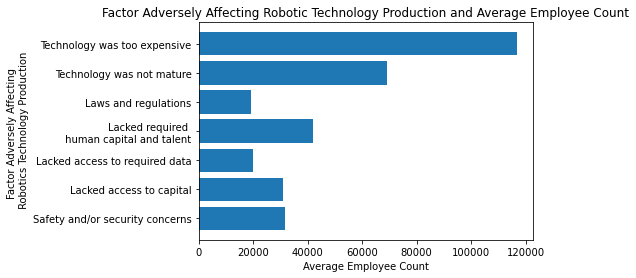

In [366]:
tech_df_robotics = tech_df_factor_grouped[22:32]
tech_df_robotics = tech_df_robotics[tech_df_robotics['FACTORS_P_LABEL'] != 'Robotics: Technology not applicable to this business']
tech_df_robotics = tech_df_robotics[tech_df_robotics['FACTORS_P_LABEL'] != 'Robotics: No factors adversely affected the adoption of this technology']
tech_df_robotics = tech_df_robotics[tech_df_robotics['FACTORS_P_LABEL'] != 'Robotics: Required data not reliable']
factors_p_label_robotics = tech_df_robotics['FACTORS_P_LABEL'].str[10:]
factors_p_label_robotics = factors_p_label_robotics.replace('Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')
factors_p_label_robotics = factors_p_label_robotics.replace('Lacked access to required human capital and talent', 'Lacked required \n human capital and talent')
robotics_emp_info = tech_df_robotics['EMP']

tech_df_robotics_plot = plt.barh(factors_p_label_robotics, robotics_emp_info)
tech_df_robotics_plot = plt.xlabel('Average Employee Count')
tech_df_robotics_plot = plt.ylabel('Factor Adversely Affecting \n Robotics Technology Production')
tech_df_robotics_plot = plt.title('Factor Adversely Affecting Robotic Technology Production and Average Employee Count')
tech_df_robotics_plot = plt.ticklabel_format(style = 'plain', axis = 'x')

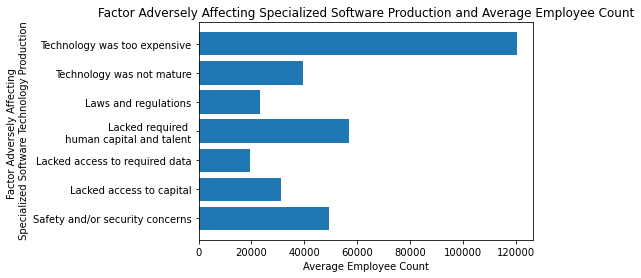

In [367]:
tech_df_specialized_software = tech_df_factor_grouped[44:54]
tech_df_specialized_software = tech_df_specialized_software[tech_df_specialized_software['FACTORS_P_LABEL'] != 
'Specialized Software: Technology not applicable to this business']

tech_df_specialized_software = tech_df_specialized_software[tech_df_specialized_software['FACTORS_P_LABEL'] != 
'Specialized Software: No factors adversely affected the adoption of this technology']

tech_df_specialized_software = tech_df_specialized_software[tech_df_specialized_software['FACTORS_P_LABEL'] != 
'Specialized Software: Required data not reliable']

factors_p_label_specialized_software = tech_df_specialized_software['FACTORS_P_LABEL'].str[22:]

factors_p_label_specialized_software = factors_p_label_specialized_software.replace(
    'Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')

factors_p_label_specialized_software = factors_p_label_specialized_software.replace(
    'Lacked access to required human capital and talent', 'Lacked required \n human capital and talent')

specialized_software_emp_info = tech_df_specialized_software['EMP']


tech_df_specialized_software_plot = plt.barh(factors_p_label_specialized_software, specialized_software_emp_info)
tech_df_specialized_software_plot = plt.xlabel('Average Employee Count')
tech_df_specialized_software_plot = plt.ylabel('Factor Adversely Affecting \n Specialized Software Technology Production')
tech_df_specialized_software_plot = plt.title('Factor Adversely Affecting Specialized Software Production and Average Employee Count')
tech_df_specialized_software_plot = plt.ticklabel_format(style = 'plain', axis = 'x')

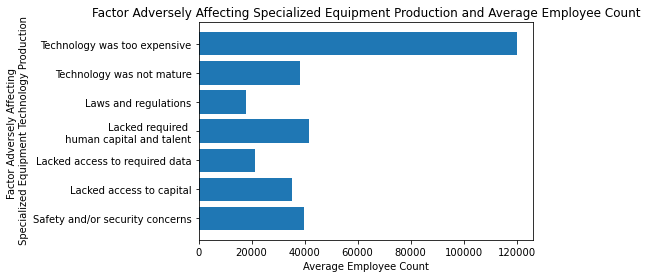

In [330]:
tech_df_specialized_equipment = tech_df_factor_grouped[33:43]
tech_df_specialized_equipment = tech_df_specialized_equipment[tech_df_specialized_equipment['FACTORS_P_LABEL'] != 
'Specialized Equipment: Technology not applicable to this business']

tech_df_specialized_equipment = tech_df_specialized_equipment[tech_df_specialized_equipment['FACTORS_P_LABEL'] != 
'Specialized Equipment: No factors adversely affected the adoption of this technology']

tech_df_specialized_equipment = tech_df_specialized_equipment[tech_df_specialized_equipment['FACTORS_P_LABEL'] != 
'Specialized Equipment: Required data not reliable']

factors_p_label_specialized_equipment = tech_df_specialized_equipment['FACTORS_P_LABEL'].str[23:]

factors_p_label_specialized_equipment = factors_p_label_specialized_equipment.replace(
    'Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')

factors_p_label_specialized_equipment = factors_p_label_specialized_equipment.replace(
    'Lacked access to required human capital and talent', 'Lacked required \n human capital and talent')

specialized_equipment_emp_info = tech_df_specialized_equipment['EMP']

tech_df_specialized_equipment_plot = plt.barh(factors_p_label_specialized_equipment, specialized_equipment_emp_info)
tech_df_specialized_equipment_plot = plt.xlabel('Average Employee Count')
tech_df_specialized_equipment_plot = plt.ylabel('Factor Adversely Affecting \n Specialized Equipment Technology Production')
tech_df_specialized_equipment_plot = plt.title('Factor Adversely Affecting Specialized Equipment Production and Average Employee Count')
tech_df_specialized_equipment_plot = plt.ticklabel_format(style = 'plain', axis = 'x')

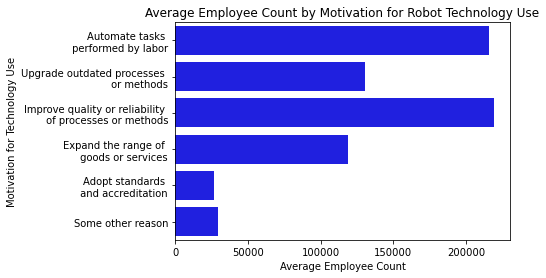

In [380]:
tech_df_motusetech_robot = tech_df[tech_df['MOTUSETECH'].str[0:2] == 'T4']
tech_df_motusetech_robot = tech_df_motusetech_robot[tech_df_motusetech_robot['ETH_GROUP_LABEL'] == 'Total']
tech_df_motusetech_robot['EMP'] = tech_df_motusetech_robot['EMP'].astype('int32')
tech_df_motusetech_robot_grouped = tech_df_motusetech_robot.groupby('MOTUSETECH', as_index = False)['EMP'].mean()

tech_df_motusetech_robot_reason = tech_df_motusetech_robot_grouped['MOTUSETECH'][0:6]
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C01', 'Automate tasks \n performed by labor')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C02', 'Upgrade outdated processes \n or methods')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C03', 'Improve quality or reliability \n of processes or methods')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C04', 'Expand the range of \n goods or services')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C05', 'Adopt standards \n and accreditation')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C06', 'Some other reason')

tech_df_robot_emp = tech_df_motusetech_robot_grouped['EMP'][0:6]
tech_df_robot_emp

sns.barplot(x = tech_df_robot_emp, y = tech_df_motusetech_robot_reason, color = 'Blue').set(xlabel = 'Average Employee Count',
ylabel = 'Motivation for Technology Use',
title = 'Average Employee Count by Motivation for Robot Technology Use'); 

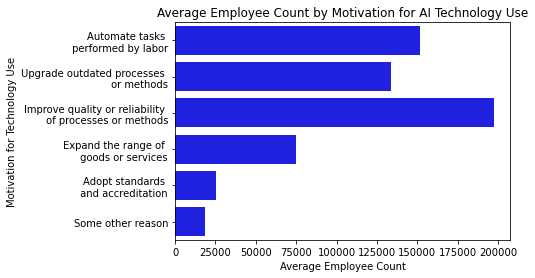

In [379]:
tech_df_motusetech_ai = tech_df[tech_df['MOTUSETECH'].str[0:2] == 'T1']
tech_df_motusetech_ai = tech_df_motusetech_ai[tech_df_motusetech_ai['ETH_GROUP_LABEL'] == 'Total']
tech_df_motusetech_ai['EMP'] = tech_df_motusetech_ai['EMP'].astype('int32')
tech_df_motusetech_ai_grouped = tech_df_motusetech_ai.groupby('MOTUSETECH', as_index = False)['EMP'].mean()

tech_df_motusetech_ai_reason = tech_df_motusetech_ai_grouped['MOTUSETECH'][0:6]
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C01', 'Automate tasks \n performed by labor')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C02', 'Upgrade outdated processes \n or methods')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C03', 'Improve quality or reliability \n of processes or methods')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C04', 'Expand the range of \n goods or services')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C05', 'Adopt standards \n and accreditation')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C06', 'Some other reason')

tech_df_robot_emp = tech_df_motusetech_ai_grouped['EMP'][0:6]
tech_df_robot_emp

sns.barplot(x = tech_df_robot_emp, y = tech_df_motusetech_ai_reason, color = 'Blue').set(xlabel = 'Average Employee Count',
ylabel = 'Motivation for Technology Use',
title = 'Average Employee Count by Motivation for AI Technology Use'); 